Found 3187 images belonging to 11 classes.

🔍 Evaluating MobileNetV2...


d:\Downloads\Multiclass Fish Image Classification\.conda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


                                  precision    recall  f1-score   support

                     animal_fish       0.99      1.00      0.99       520
                animal_fish_bass       1.00      0.54      0.70        13
   fish_sea_food black_sea_sprat       1.00      0.99      0.99       298
   fish_sea_food gilt_head_bream       1.00      0.98      0.99       305
   fish_sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish_sea_food red_mullet       1.00      0.99      1.00       291
     fish_sea_food red_sea_bream       0.98      1.00      0.99       273
          fish_sea_food sea_bass       0.99      1.00      0.99       327
            fish_sea_food shrimp       1.00      1.00      1.00       289
fish_sea_food striped_red_mullet       0.98      1.00      0.99       293
             fish_sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.99      3187
                       macro avg    

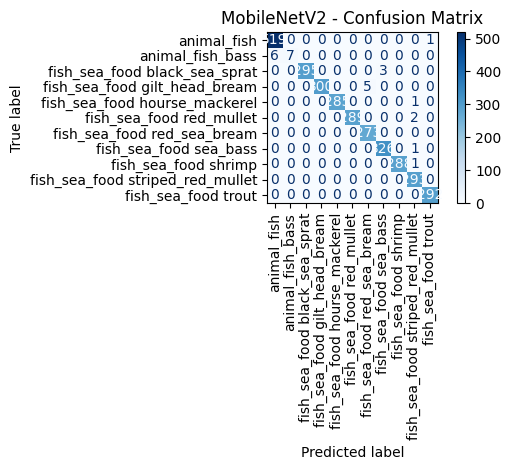


🔍 Evaluating InceptionV3...


                                  precision    recall  f1-score   support

                     animal_fish       0.99      0.99      0.99       520
                animal_fish_bass       0.91      0.77      0.83        13
   fish_sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish_sea_food gilt_head_bream       0.99      1.00      0.99       305
   fish_sea_food hourse_mackerel       0.99      1.00      0.99       286
        fish_sea_food red_mullet       0.97      1.00      0.98       291
     fish_sea_food red_sea_bream       1.00      0.99      0.99       273
          fish_sea_food sea_bass       0.98      0.99      0.99       327
            fish_sea_food shrimp       1.00      1.00      1.00       289
fish_sea_food striped_red_mullet       1.00      0.94      0.97       293
             fish_sea_food trout       0.99      1.00      1.00       292

                        accuracy                           0.99      3187
                       macro avg    

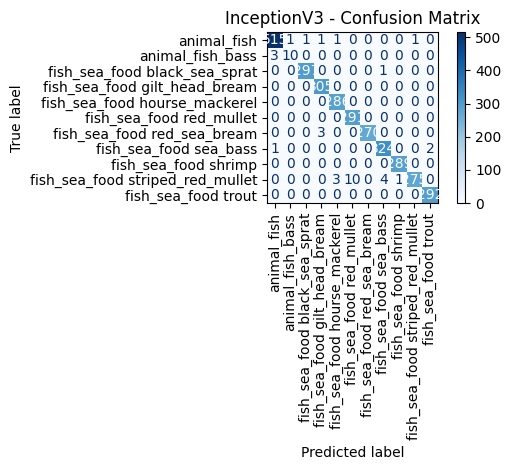


🔍 Evaluating NASNetMobile...


                                  precision    recall  f1-score   support

                     animal_fish       0.98      0.99      0.98       520
                animal_fish_bass       1.00      0.23      0.38        13
   fish_sea_food black_sea_sprat       0.99      0.96      0.97       298
   fish_sea_food gilt_head_bream       0.96      0.97      0.97       305
   fish_sea_food hourse_mackerel       0.97      0.97      0.97       286
        fish_sea_food red_mullet       1.00      0.89      0.94       291
     fish_sea_food red_sea_bream       0.97      1.00      0.98       273
          fish_sea_food sea_bass       0.95      0.98      0.96       327
            fish_sea_food shrimp       0.99      1.00      0.99       289
fish_sea_food striped_red_mullet       0.88      0.97      0.92       293
             fish_sea_food trout       0.99      0.97      0.98       292

                        accuracy                           0.97      3187
                       macro avg    

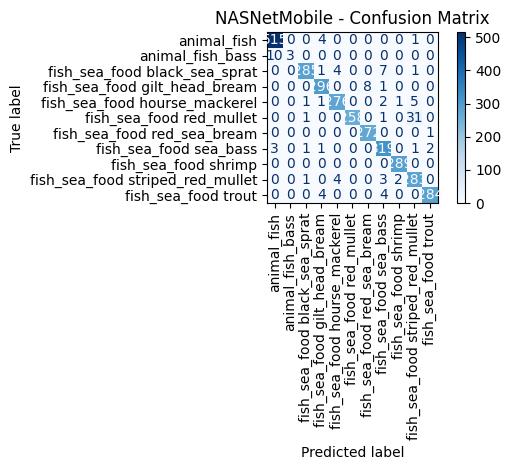


🔍 Evaluating EfficientNetB0...


d:\Downloads\Multiclass Fish Image Classification\.conda\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Downloads\Multiclass Fish Image Classification\.conda\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Downloads\Multiclass Fish Image Classification\.conda\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

                                  precision    recall  f1-score   support

                     animal_fish       0.16      1.00      0.28       520
                animal_fish_bass       0.00      0.00      0.00        13
   fish_sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish_sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish_sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish_sea_food red_mullet       0.00      0.00      0.00       291
     fish_sea_food red_sea_bream       0.00      0.00      0.00       273
          fish_sea_food sea_bass       0.00      0.00      0.00       327
            fish_sea_food shrimp       0.00      0.00      0.00       289
fish_sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish_sea_food trout       0.00      0.00      0.00       292

                        accuracy                           0.16      3187
                       macro avg    

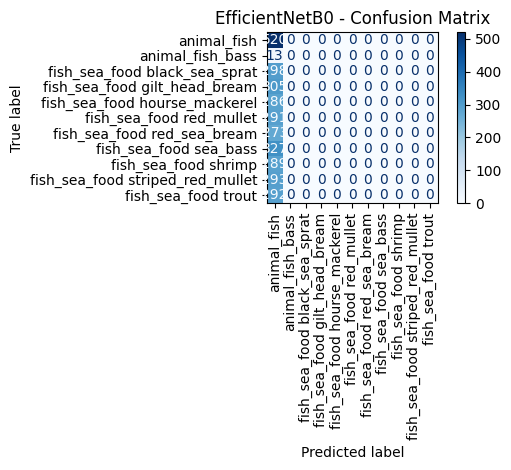

In [1]:
# ✅ Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
TEST_DIR = 'data/test'

# If models used rescale
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

def evaluate_model(model_path, model_name):
    print(f"\n🔍 Evaluating {model_name}...")
    model = load_model(model_path)

    # Predict
    y_pred_probs = model.predict(test_generator, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Metrics
    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(xticks_rotation=90, cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }

results = []

results.append(evaluate_model("mobilenetv2_fish_model.h5", "MobileNetV2"))
results.append(evaluate_model("inceptionv3_fish_model.h5", "InceptionV3"))
results.append(evaluate_model("nasnetmobile_fish_model.h5", "NASNetMobile"))
results.append(evaluate_model("efficientnetb0_fish_model.h5", "EfficientNetB0"))
